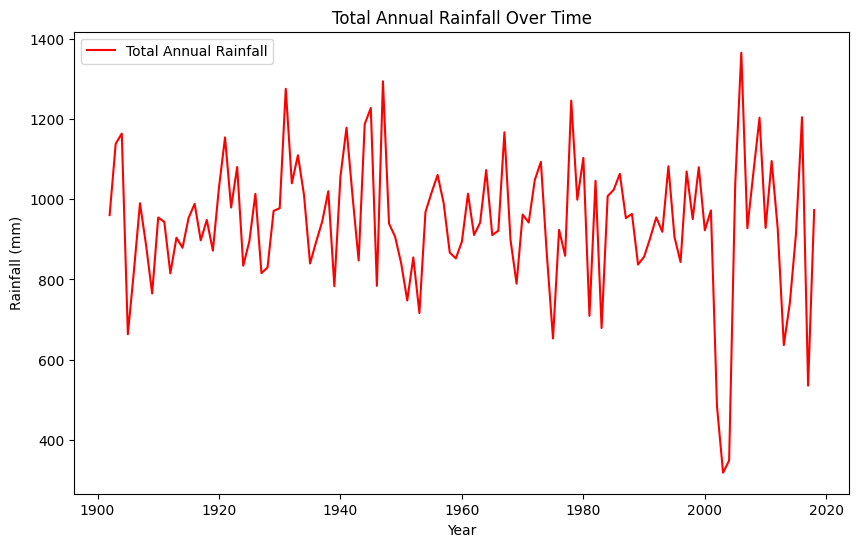

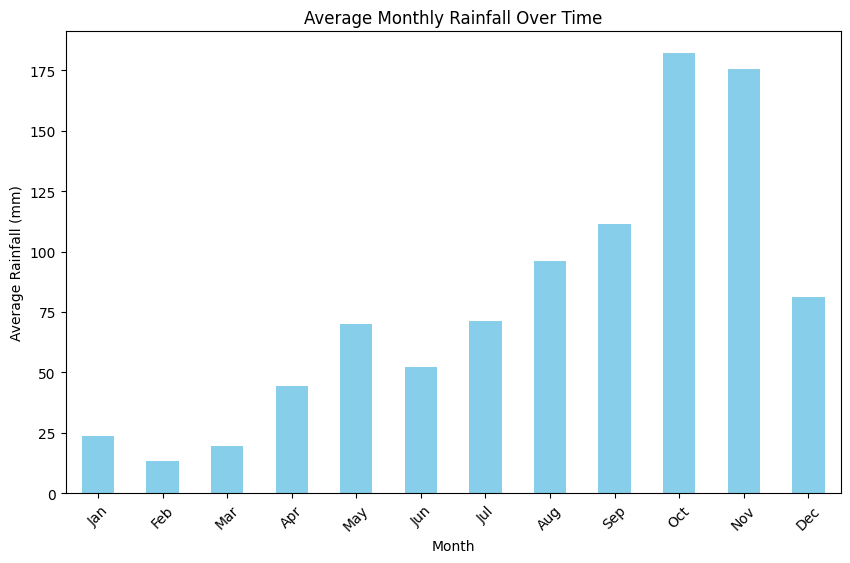

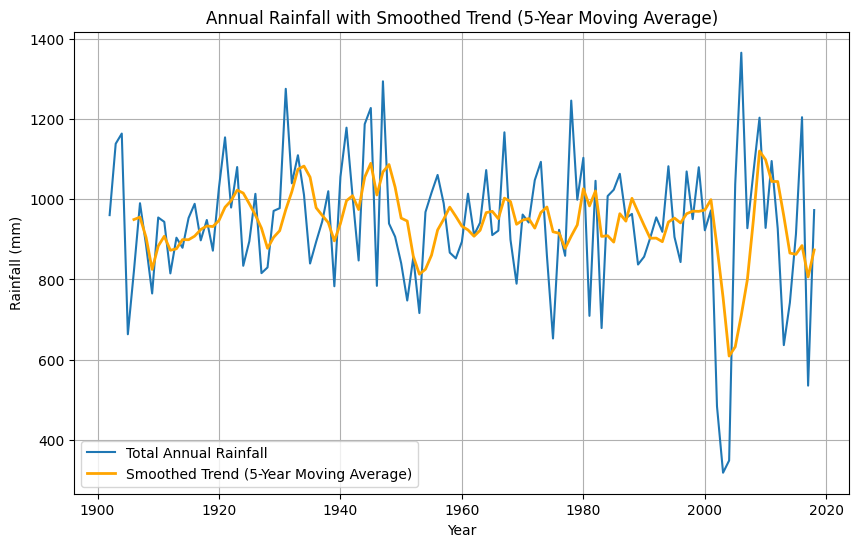

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

db = pd.read_csv("./Rainfall_Data_LL.csv")

db_test = db.melt(id_vars=["Year"], var_name="Month", value_name="Rainfall")

month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

db_test['Month'] = db_test['Month'].map(month_map)

db_test['Date'] = pd.to_datetime(db_test[['Year', 'Month']].assign(DAY=1))

db_test.set_index('Date', inplace=True)

annual_rainfall = db_test.resample('YE')['Rainfall'].sum()

plt.figure(figsize=(10, 6))
plt.plot(annual_rainfall.index, annual_rainfall.values, label='Total Annual Rainfall', color='red')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Total Annual Rainfall Over Time')
plt.legend()
plt.show()

monthly_avg_rainfall = db_test.groupby('Month')['Rainfall'].mean()

monthly_avg_rainfall.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Monthly Rainfall Over Time')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

